# Predicting the Default Rate for Credit Card Application

## The goal of this project is to show how to predict default on borrowing from the banks by using statistical `exploratory data analysis`, `machine learning` and `deep learning`. 

** *------------------------------------------------------------* **
# Import some Libraries 

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import tree

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, classification_report
from sklearn.preprocessing import RobustScaler

import os     
os.environ["PATH"] += os.pathsep + 'C:/Users/abulla/Anaconda3/Lib/site-packages/graphviz/'
from sklearn.tree import export_graphviz
%matplotlib inline

---------------------------------------

## Get the Data

In [65]:
 df = pd.read_csv("default_of_credit_card.csv", header = 1)

In [66]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


* we can see from the data that:
    * the titles of the features are in capital. We need to change them to lowercase.
    * PAY_1, is missing. PAY_0 is meant to be PAY_1

In [67]:
df.columns = [x.lower() for x in df.columns]
credit_default = df.rename(index=str, columns={"pay_0": "pay_1"})
credit_default = credit_default.drop('id', axis=1)
credit_default.columns


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [68]:
credit_default.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Attribute Information:
### 23 variables as explanatory variables: PLEASE Double Click on the Table to read the Markdown clearly.

|-----------------------------|-------------------------------------------------------------|
| Variables                   | Description                                                 |
|-----------------------------|-------------------------------------------------------------|
| Yes = 1, No = 0             | default payment                                             |
|-----------------------------|-------------------------------------------------------------|
| limit_bal (X1)              | Amount of the given credit (NT dollar):                     |
|                             |   it includes both the individual consumer credit and       |
|                             |   his/her family (supplementary) credit.                    |
|-----------------------------|-------------------------------------------------------------|
| sex (X2)                    | 1 = male; 2 = female                                        |
|-----------------------------|-------------------------------------------------------------|
| education (X3)              | 1 = graduate school; 2 = university;                        | 
|                             | 3 = high school; 4 = others                                 |
|-----------------------------|-------------------------------------------------------------|
| marriage (X4)               | 1 = married; 2 = single; 3 = others                         |
|-----------------------------|-------------------------------------------------------------|
| age (X5)                    | year                                                        |
|-----------------------------|-------------------------------------------------------------|
| pay_1 - pay_6               | History of past payment.                                    |
|   (X6 - X11)                |  X6 = the repayment status in September, 2005;              |
|                             |  X7 = the repayment status in August, 2005; . . .;          | |                             |  X11 = the repayment status in April, 2005.                 |
|                             | The measurement scale for the repayment status is:          | |                             |   -1 = pay duly; 1 = payment delay for one month;           |
|                             |    2 = payment delay for two months; . . .;                 |
|                             |    8 = payment delay for eight months;                      |
|                             |    9 = payment delay for nine months and above.             |
|-----------------------------|-------------------------------------------------------------|
| bill_amt1 - bill_amt6       | Amount of bill statement (NT dollar).                       | |   (X12 -X17)                |  X12 = amount of bill statement in September, 2005;         |
|                             |  X13 = amount of bill statement in August, 2005; . . .;     |
|                             |  X17 = amount of bill statement in April, 2005.             |
|-----------------------------|-------------------------------------------------------------|
| pay_amt1 - pay_amt6         | Amount of previous payment (NT dollar).                     |
|                             |  X18 = amount paid in September, 2005;                      | |                             |  X19 = amount paid in August, 2005; . . .;                  |
|                             |  X23 = amount paid in April, 2005.                          |
|-----------------------------|-------------------------------------------------------------|


** Use info and describe() on fd**

In [69]:
credit_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
limit_bal                     30000 non-null int64
sex                           30000 non-null int64
education                     30000 non-null int64
marriage                      30000 non-null int64
age                           30000 non-null int64
pay_1                         30000 non-null int64
pay_2                         30000 non-null int64
pay_3                         30000 non-null int64
pay_4                         30000 non-null int64
pay_5                         30000 non-null int64
pay_6                         30000 non-null int64
bill_amt1                     30000 non-null int64
bill_amt2                     30000 non-null int64
bill_amt3                     30000 non-null int64
bill_amt4                     30000 non-null int64
bill_amt5                     30000 non-null int64
bill_amt6                     30000 non-null int64
pay_amt1                     

---------------------------------------------

##  Data Preprocessing

In [70]:
# Transform some attributes such as female, other_education, not_married
# Use n-1 rull.
credit_default['grad_school'] = (credit_default['education']==1).astype('int')
credit_default['university'] = (credit_default['education']==2).astype('int')
credit_default['high_school'] = (credit_default['education']==3).astype('int')
credit_default.drop('education', axis=1, inplace=True)


In [71]:
credit_default['male'] = (credit_default['sex']==1).astype('int')
credit_default.drop('sex', axis=1, inplace=True)

credit_default['married'] = (credit_default['marriage']==1).astype('int')
credit_default.drop('marriage', axis =1, inplace=True)

In [72]:
#  if the `pay_features` <= 0 then it means it was not delayed
pay_features = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for j in pay_features:
    credit_default.loc[credit_default[j]<=0, j] = 0
credit_default.rename(columns={'default payment next month': 'default'}, inplace =True)

In [73]:
# Visualize the transformed dataset
credit_default.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,1,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1


In [74]:
credit_default.to_csv('cleaned_cerditcard.csv', sep = ',')

# Some visualization


In [75]:
# import regex
import re

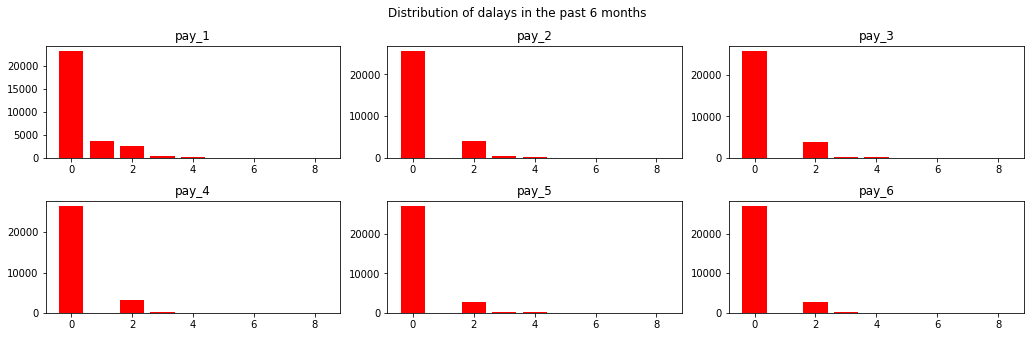

In [76]:
pattern = re.compile("^pay_[0-9]+$")
payment_status = [ x for x in credit_default.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')

for i in range(len(payment_status)):
    row,col = int(i/3), i%3

    d  = credit_default[payment_status[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='r')
    ax[row,col].set_title(payment_status[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

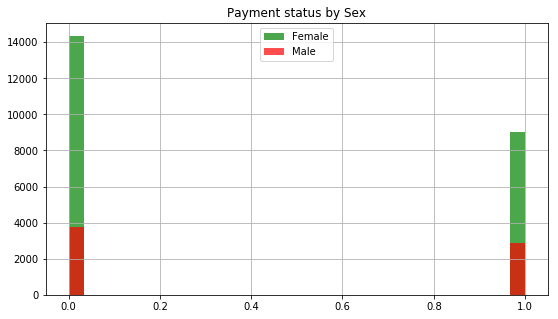

In [77]:
# Payment status by Sex
male = credit_default[credit_default['default']==1]['male']
female = credit_default[credit_default['default']==0]['male']

fig = plt.figure(figsize = (9,5))
plt.title("Payment status by Sex")
female.hist(color="green", alpha=0.7, bins = 30, label="Female")
male.hist(color="red", alpha=0.7, bins = 30, label="Male" )
plt.legend(loc="upper center")

In [78]:
# pay status columns
pattern = re.compile("^pay_amt[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]
df[pay_amount_columns].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


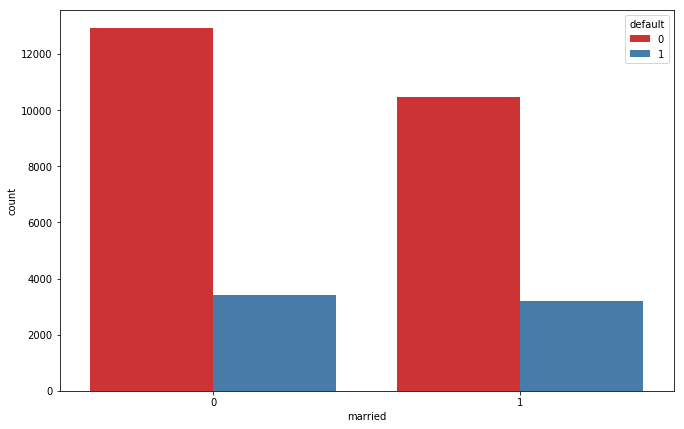

In [79]:
# Let make pairplot using seaborn
plt.figure(figsize=(11,7))
sns.countplot(x='married',hue='default',data=credit_default,palette='Set1')

# Model Specification

## Import the following for data processing

## Specify the Dependent and Independent Variables or features

In [80]:
# Our dependent feature or target(respondent) variable will the `default` (y)
traget_name = 'default'


In [81]:
# Our independent features or explantory variables (X)
X= credit_default.drop('default', axis=1)


In [82]:
X.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,689,0,0,0,0,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,1,1


### Let use roubust_scaler to transform our data to fit for the analysis

In [83]:
roubust_scaler= RobustScaler()
X= roubust_scaler.fit_transform(X)
y= credit_default[traget_name]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)


## Let define a common DataFrame for our Models analysis and comparisons

In [84]:
# DataFrame for our Models Analysis
def CMatrix(CM, labels =['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    #df.index.name='True'
    df.columns.name="Prediction"
    df.loc["Total"] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [85]:
#Data frame for evaluation metrics for the models we are going to evaluate
eval_metrix = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                columns=['LogisticReg', 'ClassTree', 'RandomForest','NaiveBayes'])

In [86]:
# Let view our empty dataframe
eval_metrix

,LogisticReg,ClassTree,RandomForest,NaiveBayes
accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN


## 1. Logistic Regression

### Follow the 5 main steps in Model Dev't in ML

* import the estimator object
* Create on Instance of the estimator
* Use the trainning data to train the estimator
* Evalute the model
* print out Confusion matrix using CM we have defined earlier



In [87]:

# Import
from sklearn.linear_model import LogisticRegression
# Instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state =15)
# train the estimator
logistic_regression.fit(X_train, y_train)

# Evalute the model
y_pred_test = logistic_regression.predict(X_test)
# we conduct our evaluation using these 3 _score
eval_metrix.loc['accuracy', 'LogisticReg']= accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['precision', 'LogisticReg']= precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['recall', 'LogisticReg']= recall_score(y_pred=y_pred_test, y_true=y_test)    

# Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Prediction,pay,default,Total
pay,3365,140,3505
default,671,324,995
Total,4036,464,4500


In [88]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.83      0.96      0.89      3505
          1       0.70      0.33      0.44       995

avg / total       0.80      0.82      0.79      4500



In [89]:
#Recall = TP/(TP + FN) => is a true positive rate
Recall = 324/(324+671)
Recall

0.3256281407035176

In [90]:
#Precision = TP/(TP + FP) => is a measure of accuracy
Precision = 324/(324+140)
Precision

0.6982758620689655

In [91]:
# f1_score = 2*(Precision*Recall)/(Precision + Recall)
f1_score = 2*(0.6982758620689655*0.3256281407035176)/(0.6982758620689655 + 0.3256281407035176)
f1_score

0.44413982179575057

### Take the first row, and look the matrix.
* For example `pay` by `pay` at Row 1 and Column 2:- shows the number of credit card holders who have been predicted by the logistic_regression model correctly as these who actually have paid their loan. 
* By the same token, `pay` by `default`, row 1 and column 3, are these credit card holders who have been predicted by logistic_regression model to be `defaulter` while they actually paid their loan.

## 2. Decision Trees

* import the estimator object
* Create on Instance of the estimator
* Use the trainning data to train the estimator
* Evalute the model
* print out Confusion matrix using CM we have defined earlier

In [92]:

# Import 
from sklearn.tree import DecisionTreeClassifier

# Instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# train the estimator
class_tree.fit(X_train, y_train)

# Evaluate the model
y_pred_test = class_tree.predict(X_test)
# we conduct our evaluation using these 3 _score
eval_metrix.loc['accuracy', 'ClassTree']= accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['precision', 'ClassTree']= precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['recall', 'ClassTree']= recall_score(y_pred=y_pred_test, y_true=y_test)  

# Confussion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)  


Prediction,pay,default,Total
pay,3185,320,3505
default,634,361,995
Total,3819,681,4500


In [93]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      3505
          1       0.53      0.36      0.43       995

avg / total       0.77      0.79      0.77      4500



In [94]:
#Recall = TP/(TP + FN) => is a true positive rate
Recall = 361/(361+634)
Recall

0.3628140703517588

In [95]:
#Precision = TP/(TP + FP) => is a measure of accuracy
Precision = 361/(361+320)
Precision

0.5301027900146843

In [96]:
# f1_score = 2*(Precision*Recall)/(Precision + Recall)
f1_score = 2*(0.5301027900146843*0.3628140703517588)/(0.5301027900146843 + 0.3628140703517588)
f1_score

0.4307875894988067

In [97]:
## Let print out our Trees

In [98]:
independent_var = ['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'grad_school',
       'university', 'high_school', 'male', 'married']

In [99]:
import mglearn
%matplotlib inline
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(class_tree, out_file="mytree.dot", feature_names=independent_var, class_names=['yes', 'no'], impurity=False, filled=True)



![](mytree.png)

## 3.  Random Forest model

* import the estimator object
* Create on Instance of the estimator
* Use the trainning data to train the estimator
* Evalute the model
* print out Confusion matrix using CM we have defined earlier

In [100]:


# Import 
from sklearn.ensemble import RandomForestClassifier

# Instance of the estimator
random_forest = RandomForestClassifier(n_estimators=20, random_state=10)

# train the estimator
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred_test = random_forest.predict(X_test)
# we conduct our evaluation using these 3 _score
eval_metrix.loc['accuracy', 'RandomForest']= accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['precision', 'RandomForest']= precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['recall', 'RandomForest']= recall_score(y_pred=y_pred_test, y_true=y_test)  

# Confussion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)  

Prediction,pay,default,Total
pay,3316,189,3505
default,652,343,995
Total,3968,532,4500


In [101]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3505
          1       0.64      0.34      0.45       995

avg / total       0.79      0.81      0.79      4500



In [102]:
#Recall = TP/(TP + FN) => is a true positive rate
Recall = 343/(343+ 652)
Recall

0.34472361809045227

In [103]:
#Precision = TP/(TP + FP) => is a measure of accuracy
Precision = 343/(342+189)
Precision

0.6459510357815442

In [104]:
# f1_score = 2*(Precision*Recall)/(Precision + Recall)
f1_score = 2*(0.6459510357815442*0.34472361809045227)/(0.6459510357815442 + 0.34472361809045227)
f1_score

0.4495412844036697

## 3. Naive Bayes Classifier

* import the estimator object
* Create on Instance of the estimator
* Use the trainning data to train the estimator
* Evalute the model
* print out Confusion matrix using CM we have defined earlier

In [105]:

# Import 
from sklearn.naive_bayes import GaussianNB
# Instance of the estimator
NBC = GaussianNB()
# 3.  train the estimator
NBC.fit(X_train, y_train)
# Evaluate the model
y_pred_test = NBC.predict(X_test)
eval_metrix.loc['accuracy', 'NaiveBayes']= accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['precision', 'NaiveBayes']= precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrix.loc['recall', 'NaiveBayes']= recall_score(y_pred=y_pred_test, y_true=y_test)  
# Confussion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)  

Prediction,pay,default,Total
pay,2912,593,3505
default,439,556,995
Total,3351,1149,4500


In [106]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85      3505
          1       0.48      0.56      0.52       995

avg / total       0.78      0.77      0.78      4500



In [107]:
#Recall = TP/(TP + FN) => is a true positive rate
Recall = 556/(556+ 439)
Recall

0.5587939698492462

In [108]:
#Precision = TP/(TP + FP) => is a measure of accuracy
Precision = 556/(556+593)
Precision

0.48389904264577893

In [109]:
# f1_score = 2*(Precision*Recall)/(Precision + Recall)
f1_score = 2*(0.48389904264577893*0.5587939698492462)/(0.48389904264577893 + 0.5587939698492462)
f1_score

0.5186567164179104

----------------------------

In [110]:
# Evaluation Metrix for all the models

100*eval_metrix

,LogisticReg,ClassTree,RandomForest,NaiveBayes
accuracy,81.9778,78.8,81.3111,77.0667
precision,69.8276,53.0103,64.4737,48.3899
recall,32.5628,36.2814,34.4724,55.8794


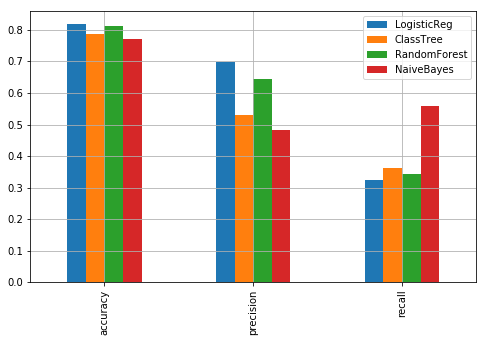

In [111]:
fig, ax=plt.subplots(figsize=(8,5))
eval_metrix.plot(kind='bar', ax=ax)
ax.grid();
fig.savefig('eval_metrix.png')

--------------------------------

* we can see from the above graph that, 
    * In terms of accurcy, the best model is LogisticReg
    * In terms of prcision, the best model is LogisticReg
    * In terms of recall, the best model is NaiveBayes
* However we can improve the performance of our model by adjusting the values of precision and recall by modifying the classification thresholds.

* Here, our obective is to adjust the threshold level where LR will give a better recall than NaviveBayes.
* We can use the `precision_recall_curve` to do this. This the role of supervisze learning in ML.

## Let now `supervise` our model by using `precision_recall_curve`

In [112]:
precision_nb, recall_nb, thresholds_nb= precision_recall_curve(y_true=y_test, probas_pred=NBC.predict_proba(X_test)[:,1])
precision_lr, recall_lr, thresholds_lr= precision_recall_curve(y_true=y_test, probas_pred=logistic_regression.predict_proba(X_test)[:,1])

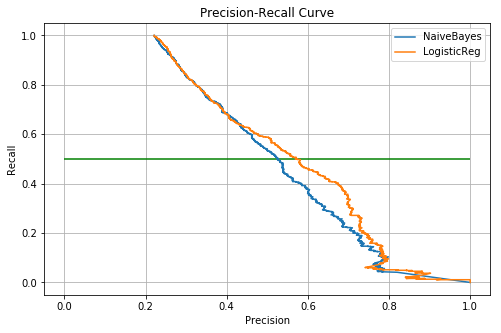

In [113]:
# Now print out the Precision-Recall Curve to compare them
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_nb, recall_nb, label="NaiveBayes")
ax.plot(precision_lr, recall_lr, label="LogisticReg")
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='green')
ax.legend()
ax.grid();

* We can see from the graph that at the recall value shown by the stright line, LogisticReg Model is higher value than NavieBayes model.
* So Logistic is the better model to predict the default as compare to NaiveBayes
* But,we need to 

## Confusion matrix for modified Logistic Regression Classifier

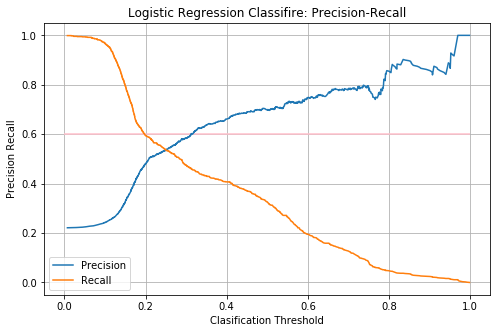

In [114]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label="Precision")
ax.plot(thresholds_lr, recall_lr[1:], label="Recall")
ax.set_xlabel('Clasification Threshold')
ax.set_ylabel('Precision Recall')
ax.set_title('Logistic Regression Classifire: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='pink')
ax.legend()
ax.grid();

# From the above graph, we can see that we can adjust the Recall to be better that Percision by changing the classification threshold.
### Classifier with threshold of 0.2

In [115]:
y_pred_proba = logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')

In [116]:
# Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  59.497487437185924
Precision:  47.896440129449836


Prediction,pay,default,Total
pay,2861,644,3505
default,403,592,995
Total,3264,1236,4500


### Take the first row, and look the matrix.
* For example `pay` by `pay` at Row 1 and Column 2:- shows the number of credit card holders who have been predicted by the logistic_regression model correctly as these who actually have paid their loan. 
* By the same token, `pay` by `default`, row 1 and column 3, are these credit card holders who have been predicted by logistic_regression model to be `defaulter` while they actually paid their loan.

In [117]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.88      0.82      0.85      3505
          1       0.48      0.59      0.53       995

avg / total       0.79      0.77      0.78      4500



In [118]:
#Recall = TP/(TP + FP) => is a true positive rate
Recall = 592/(592+403)
Recall

0.5949748743718593

In [119]:
#Precision = TP/(TP + FP) => is a measure of accuracy
Precision = 592/(592+644)
Precision

0.47896440129449835

## Let define a function for individual customer predictions using Logistic Regression¶

In [120]:
def ind_customer_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = roubust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default'
    else:
        return 'Will pay'

In [121]:
 pay = credit_default[credit_default['default']==0]

In [122]:
pay.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,657,1000,1000,800,0,1,0,0,1,0
6,500000,29,0,0,0,0,0,0,367965,412023,...,38000,20239,13750,13770,0,1,0,0,1,0


In [123]:
from collections import OrderedDict

new_customer = OrderedDict([('limit_bal', 4000), ('age', 50), ('bill_amt1', 500),
('bill_amt2', 35509), ('bill_amt3', 689), ('bill_amt4', 0),
('bill_amt5', 0), ('bill_amt6', 0), ('pay_amt1', 0),('pay_amt2', 35509),
('pay_amt3', 0), ('pay_amt4', 0), ('pay_amt5', 0), ('pay_amt6', 0),
('male', 1), ('grad_school', 0), ('university', 1), ('hight_school', 0),
('married', 1), ('pay_1', -1), ('pay_2', -1), ('pay_3', -1),
('pay_4', 0), ('pay_5', -1)
                            , ('pay_6', 0)])

new_customer = pd.Series(new_customer)
ind_customer_prediction(new_customer)

'Will default'

----------------------------------------------------

-------------------End---------------------------------------

In [131]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [141]:
from keras.layers import Dense
number_inputs = 4
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [142]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [143]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_1_input to have shape (3,) but got array with shape (25,)

# Tensorflow

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
scaler.fit(credit_default.drop('default',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [124]:
import tensorflow as tf

In [127]:
X = df_feat

NameError: name 'df_feat' is not defined